In [3]:
pip install seaborn



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# df = pd.read_csv('output_data_final.csv');
sheet_name_or_index = 1
df = pd.read_excel('working on thesis paper.xlsx',sheet_name='All Data')
# for removing all the row with null price
# dfnew=df.replace(to_replace='(?i)negotiable', value=pd.NA, regex=True, inplace=True)

# df_cleaned = df["PRICE"].dropna()
# print(len(df_cleaned));
#df



FileNotFoundError: [Errno 2] No such file or directory: 'working on thesis paper.xlsx'

In [ ]:
#Only select Makeyear and KM and clean up data to conver to integer make a regression equation and scatterplot to know if we can predict km from makeyear
df2 = df.loc[:, ["MAKEYEAR", "KM_INT"]]
df2.head()
# we drop all year with null year
df2["MAKEYEAR"].dropna(inplace=True)
print((df2["MAKEYEAR"]).unique());
#check info of df2
df2.head()

[2019. 2006. 2009. 2016. 2014. 2018. 2008. 2010. 2011. 2004. 2005. 2013.
 2021. 2017. 2023. 1998. 1991. 2015. 2020.   nan 2012. 2000. 2007. 1993.
 1999. 2001. 2002. 2022. 2003. 1992. 1997. 1990. 1996. 1950. 1952. 1989.
 1995. 1994. 1988. 1987. 1982. 1970. 1968. 1979. 1900. 1981. 1965. 1980.
 1973.]


,MAKEYEAR,KM_INT
0,2019.0,NaN
1,2006.0,Null
2,2009.0,Null
3,2016.0,Null
4,2016.0,Null


In [ ]:
#Drop all column with null value for KM and makeyear

import numpy as np
import pandas as pd

df2['KM_INT'] = pd.to_numeric(df2['KM_INT'], errors='coerce')
df2['MAKEYEAR'] = pd.to_numeric(df2['MAKEYEAR'], errors='coerce')

# Remove rows with NaN values (non-numeric values)
df2 = df2.dropna(subset=['KM_INT', 'MAKEYEAR'])
df2 = df2[(df2['KM_INT'] != 0) & (df['MAKEYEAR'] != 0)]

print(df2.to_string())


/var/folders/fl/r69rsmbd5wd378_xcmctwj0c0000gn/T/ipykernel_25276/2466237855.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df2['KM_INT'] != 0) & (df['MAKEYEAR'] != 0)]


      MAKEYEAR    KM_INT
6       2019.0   60000.0
8       2008.0   90000.0
9       2016.0   55000.0
10      2010.0   69000.0
11      2011.0   45000.0
12      2016.0   42000.0
13      2004.0   63000.0
14      2014.0   52000.0
15      2005.0   75000.0
16      2009.0   62000.0
17      2013.0   60000.0
27      2015.0   24000.0
42      2009.0   15000.0
43      2000.0  145000.0
53      2016.0   78000.0
55      2015.0  117000.0
71      2015.0   39000.0
78      2010.0   52000.0
101     2019.0   57000.0
102     2015.0   48000.0
103     2019.0   27000.0
110     2018.0   35000.0
111     2021.0   17000.0
112     2019.0   12870.0
114     2020.0   15000.0
115     2019.0    9890.0
118     2018.0   28520.0
120     2015.0   31000.0
121     2017.0   35000.0
122     2020.0    5800.0
123     2006.0  126000.0
124     2017.0    2000.0
125     2015.0   80000.0
126     2016.0   80000.0
127     2016.0   80000.0
128     2018.0   80000.0
129     2017.0   80000.0
130     2017.0   43000.0
131     2016.0   80000.0


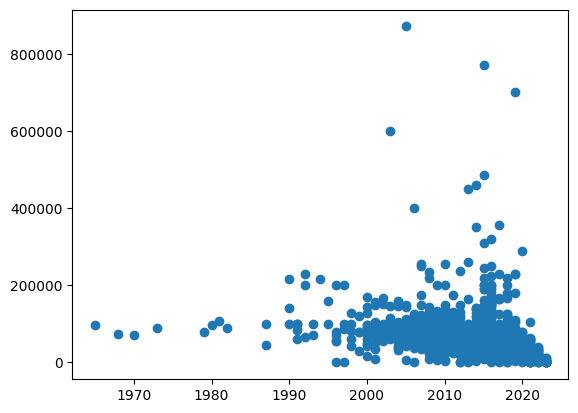

In [ ]:
#plot the data in scatter plot
import matplotlib.pyplot as plt


plt.scatter(df2["MAKEYEAR"], df2["KM_INT"])
plt.show()

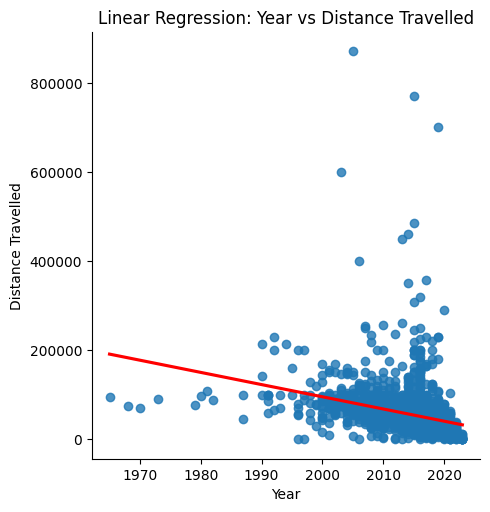

In [ ]:
#Running Linear regression for Make year and km

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

X = df2['MAKEYEAR']
y = df2["KM_INT"]
# print(X,y);
sns.lmplot(x='MAKEYEAR', y='KM_INT', data=df2, ci=None, line_kws={'color': 'red'})
plt.xlabel('Year')
plt.ylabel('Distance Travelled')
plt.title('Linear Regression: Year vs Distance Travelled')
plt.show()

Number of samples in X: 2541
Number of samples in y: 2541
R2 score is :  0.11204996714310844


ValueError: x and y must be the same size

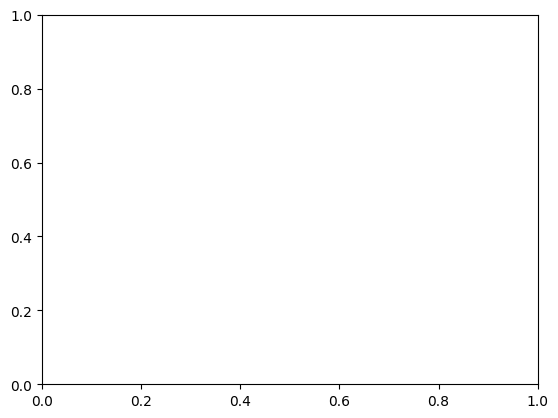

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

years_2d = np.array(df2['MAKEYEAR']).reshape(-1, 1)
X = years_2d  # Features
y = df2['KM_INT']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# By Earlier model using training set
# # Train the model
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))


# By Sagar Chapagain using initial set
model.fit(X, y)
y_pred = model.predict(X)

r2=r2_score(y, y_pred);

print("Number of samples in X:", y_pred.shape[0])
print("Number of samples in y:", y.shape[0])
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2 score is : ",r2)

#calculate r squared value
# Evaluate the model

# Plot the regression line
plt.scatter(X_train, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Distance Travelled')
plt.title('Linear Regression: Year vs Distance Travelled')
plt.show()

In [ ]:
df2["MAKEYEAR"].value_counts()


In [ ]:
df2["KM_INT"].describe()

In [ ]:
zerokm_filter = (df2["KM_INT"] == 0)

df2[zerokm_filter]

https://www.youtube.com/watch?v=Wqmtf9SA_kk&ab_channel=NeuralNine
https://www.youtube.com/watch?v=xu0prYu5e-c&ab_channel=AliNasserEddine